In [1]:
from neural_network import * 
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import pickle
logdust_func = open("logdust_3d_func.pkl", "rb")
logdust = pickle.load(logdust_func)

In [2]:
def cart2pol(x, y, z):
    '''Return polar coordinate from cartesian coordinate'''
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    if (x > 0):
        phi = np.arctan(y/x)
    elif (x < 0):
        phi = np.arctan(y/x) +np.pi 
    else:
        phi = np.pi / 2
    return [r, theta, phi] 

def pol2cart(r, theta, phi):
    '''Return cartesian coordinate from polar coordinate'''
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return [x, y, z]

In [3]:
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'axes.titlepad': '15.0'})
rcParams.update({'axes.labelpad': '15.0'})
rcParams.update({'font.size': 20})
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=r'\usepackage{amsmath}'

In [4]:
data = np.load('datasets/dustattenuation_3d_err.npz')
Xgrid, Ygrid = data['Xgrid'], data['Y_grid']
X_train, X_valid, X_test = data['X_train'], data['X_valid'], data['X_test']
Y_train, Y_valid, Y_test = data['Y_train'], data['Y_valid'], data['Y_test']
Xo_train, Xo_train, Xo_test = data['Xo_train'], data['Xo_valid'], data['Xo_test']
Yo_train, Yo_train, Yo_test = data['Yo_train'], data['Yo_valid'], data['Yo_test']

Remember to change the dataset in neural_network.py

In [2]:
model, train_loss, val_loss = train_NN_model(error=True, num_input=3)

(6000,) (6000, 100, 3)
(6000, 3)


/home/ava/.local/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



Start of epo ch 0
Training loss (for one batch) at step 0: 34185.2677
Seen so far: 100 samples
Time taken: 36.26s

Start of epo ch 1
Training loss (for one batch) at step 0: -399.7037
Seen so far: 100 samples
Time taken: 39.69s

Start of epo ch 2
Training loss (for one batch) at step 0: -446.7865
Seen so far: 100 samples
Time taken: 44.32s

Start of epo ch 3
Training loss (for one batch) at step 0: -499.9101
Seen so far: 100 samples
Time taken: 45.57s

Start of epo ch 4
Training loss (for one batch) at step 0: -518.7071
Seen so far: 100 samples
Time taken: 43.08s

Start of epo ch 5
Training loss (for one batch) at step 0: -536.7038
Seen so far: 100 samples
Time taken: 44.60s

Start of epo ch 6
Training loss (for one batch) at step 0: -539.1280
Seen so far: 100 samples
Time taken: 47.14s

Start of epo ch 7
Training loss (for one batch) at step 0: -542.6217
Seen so far: 100 samples
Time taken: 46.69s

Start of epo ch 8
Training loss (for one batch) at step 0: -550.1152
Seen so far: 100 

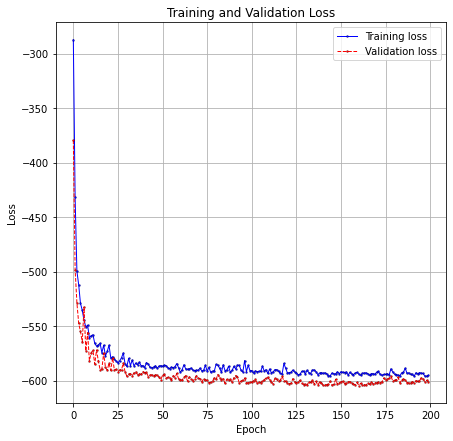

In [3]:
plt.figure(figsize=(7, 7)) 
plt.plot(train_loss, label='Training loss', color='blue', linestyle='-', linewidth = 1, marker = 'o', ms = 2, markeredgecolor='black', markeredgewidth=0.2)
plt.plot(val_loss, label='Validation loss', color='red', linestyle='dashed', linewidth = 1, marker = 'o', ms = 2, markeredgecolor='black', markeredgewidth=0.2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.savefig('plots/loss_err.png', bbox_inches='tight')

In [5]:
# model.save('3dmodel_cartesion_err')
model = tf.keras.models.load_model('3dmodel_cartesion_err')

In [6]:
# generate a list of points along line of sight to X_test first star -- set a fixed value for x, y, z
delta_r = 0.001
ngrid, edge = 21, 2.5
max_r = edge * 2

In [11]:
for i in range(200, 300):
    x, y, z = X_test[i]
    r, theta, phi = cart2pol(x, y, z)
    los_pos = []
    los_pos_r = []
    valid_r = 0

    for r_prime in np.arange(0, max_r, delta_r):
        pos_prime = pol2cart(r_prime, theta, phi)
        los_pos.append(pos_prime)
        los_pos_r.append(r_prime)
        x_prime, y_prime, z_prime = pos_prime[0], pos_prime[1], pos_prime[2]
        # print(x_prime, y_prime, z_prime)
        if (x_prime > edge or x_prime < -edge or y_prime > edge or y_prime < -edge or z_prime > edge or z_prime < -edge) and valid_r == 0:
            valid_r = r_prime 

    los_pos = np.asarray(los_pos)
    pred = get_NN_pred(model, los_pos)

    r_samples = []

    for x, y, z in Xo_test[i]:
        r, theta, phi = cart2pol(x, y, z)
        r_samples.append(r)
    
    plt.figure(figsize=(7, 7)) 
    plt.plot(los_pos_r, pred, color='#8f0000', linestyle='-', linewidth = 1, marker = 'o', ms = 1, markeredgewidth=0.2)
    plt.scatter(r_samples, Yo_test[i], s=5, linewidths=0.2, edgecolors='black')
    plt.axvline(x = valid_r, color='black')
    plt.xlabel('r')
    plt.ylabel('A(r)')
    plt.xlim([0, max_r])
    plt.ylim([0, 10])
    x, y, z = X_test[i][0], X_test[i][1], X_test[i][2]
    r, theta, phi = cart2pol(x, y, z)
    plt.title(str(np.around(x / r, 2)) + 'i + ' + str(np.around(y/r, 2)) + 'j + ' + str(np.around(z/r, 2)) + ' k')
    plt.savefig('plots/los_plots2/' + str(i) + '.png', bbox_inches='tight')
    plt.close()